In [2]:
import pandas as pd
import os

#### Merge 12 Months of data into a single CSV file

In [6]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

#### Updated Dataframe

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean the data

#### Drop NaN rows

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### find "Or" and delete it

In [16]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### convert column to correct type

In [21]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #to float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add Month column

In [17]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [20]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add city column

In [32]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x) + ' (' + get_state(x) + ')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Best month for sales

In [25]:
results = all_data.groupby('Month').sum()

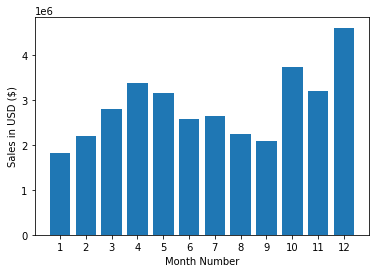

In [27]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')

plt.show()

### City with highest number of sale

In [34]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


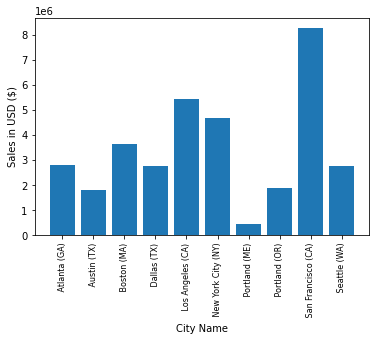

In [42]:
import matplotlib.pyplot as plt

cities = [City for City, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')

plt.show()

### What time should we display advertisements to maximize customer's likelihood to buy the product?

In [60]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


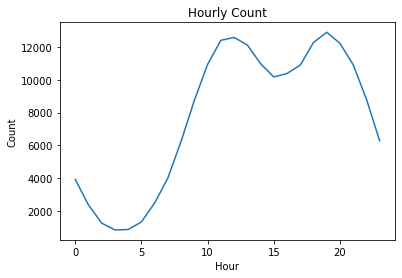

In [64]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]

counts = all_data.groupby(['Hour']).count()['Order ID']

plt.plot(hours, counts)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hourly Count')
plt.show()



### Which products are most often sold together?

In [67]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()


C:\Users\harsh\AppData\Local\Temp\ipykernel_57860\55180964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [72]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold most? and the reason

([<matplotlib.axis.XTick at 0x20f41cf4700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

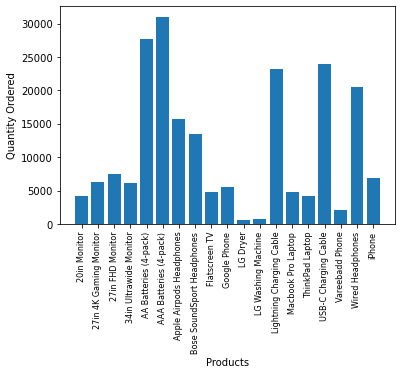

In [80]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size=8)

C:\Users\harsh\AppData\Local\Temp\ipykernel_57860\1442530051.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


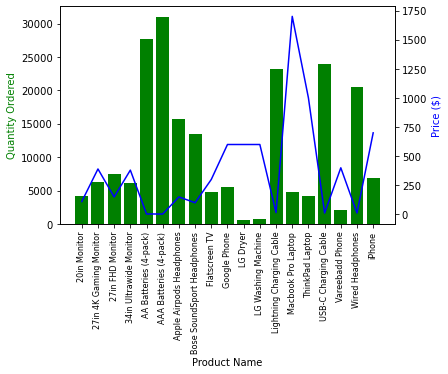

In [84]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color= 'g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()